# **Práctica 8: Fusion de datos**

Nombre(s):
- Cruz Rangel Leonardo Said
- Téllez González Jorge Luis

Email:
- leonardochow20@gmail.com
- (correo de jorge)
***

### **Contexto**
* La retinopatía diabética aparece como consecuencia del daño en los vasos sanguíneos de la retina (parte posterior del ojo). 
* El azúcar en la sangre, no controlado correctamente, es un factor de riesgo. Entre los síntomas comunes destacan: visión borrosa, visión oscura, dificultad para percibir los colores, y ceguera.
***
### **Objetivo:**
Hacer una fusión de datos a través de la media, mediana y un aproximador lineal.
***
### **Fuente de datos**
Datos recolectados en los últimos años.
***
### **Importar las bibliotecas y los datos**

In [210]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [211]:
Retinopatia = pd.read_csv('Datos/DiabeticRetinopathy.csv')
Retinopatia

,patient,patient.number,obs,health.status,group,f_000001,f_000002,f_000003,f_000004,f_000005,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,paciente151_1,151,1,health,none,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,paciente411hpf0.3hzmedian_6,411,6,health,none,201.462060,227.196312,239.527682,242.712595,233.877109,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,paciente237hpf0.3hzmedian_4,237,4,disorder,none,57.266926,42.895909,37.259729,34.940005,31.036661,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,paciente116hpf0.3hzmedian_7,116,7,health,none,229.556540,218.015928,229.962008,214.427812,169.474568,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,paciente131_2,131,2,health,none,94.251665,96.188890,101.315349,102.756134,99.327028,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,paciente396hpf0.3hzmedian_5,396,5,health,none,26.918454,30.309754,32.370351,33.266800,34.510788,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,paciente412hpf0.3hzmedian_3,412,3,health,none,444.511027,430.493455,419.294383,427.814583,464.004222,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,paciente398hpf0.3hzmedian_7,398,7,health,none,253.650671,337.009270,426.335102,487.426947,525.123416,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,paciente370hpf0.3hzmedian_6,370,6,health,none,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


# **I. Análisis Exploratorio de Datos**

## *Paso 1 - Descripción de la estructura de datos:*

1. Dimensiones del Data Frame.

Se usa el atributo **shape** de Pandas, que devuelve una tupla con la cantidad de filas y columnas.

In [212]:
Retinopatia.shape

(1112, 75)

2. Tipos de datos

Para obtener los tipos de datos de cada columna se usa **dtypes** igual de Pandas.

In [213]:
Retinopatia.dtypes

patient            object
patient.number      int64
obs                 int64
health.status      object
group              object
                   ...   
f_000066          float64
f_000067          float64
f_000068          float64
f_000069          float64
f_000070          float64
Length: 75, dtype: object

Se puede usar en conjunto con *value_counts()* para determinar la cantidad de veces que aparece cada tipo de dato en el data frame.

In [214]:
Retinopatia.dtypes.value_counts()

float64    70
object      3
int64       2
dtype: int64

Se observa que el conjontunto tiene variables categóricas y variables numéricas del tipo float e int.

## *Paso 2 - Identificación de datos faltantes*

Esto se puede hacer con la función **isnull().sum()** de Pandas, que regresa la suma de todos los valores nulos de cada columna.

In [215]:
Retinopatia.isnull().sum()

patient           0
patient.number    0
obs               0
health.status     0
group             0
                 ..
f_000066          0
f_000067          0
f_000068          0
f_000069          0
f_000070          0
Length: 75, dtype: int64

También se puede usar **info()**, que muestra una descripción general del DataFrame, incluyendo los nombres de las columnas, el número de valores no nulos, el tipo de dato de cada columna y el uso de memoria del DataFrame.

In [216]:
Retinopatia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient         1112 non-null   object 
 1   patient.number  1112 non-null   int64  
 2   obs             1112 non-null   int64  
 3   health.status   1112 non-null   object 
 4   group           1112 non-null   object 
 5   f_000001        1112 non-null   float64
 6   f_000002        1112 non-null   float64
 7   f_000003        1112 non-null   float64
 8   f_000004        1112 non-null   float64
 9   f_000005        1112 non-null   float64
 10  f_000006        1112 non-null   float64
 11  f_000007        1112 non-null   float64
 12  f_000008        1112 non-null   float64
 13  f_000009        1112 non-null   float64
 14  f_000010        1112 non-null   float64
 15  f_000011        1112 non-null   float64
 16  f_000012        1112 non-null   float64
 17  f_000013        1112 non-null   f

No hay valores nulos en el Data Frame, pero si los hubiera se pueden seguir dos alternativas:
- Eliminar los datos faltantes directamente, depende del contexto y el objetivo del análisis. Puede afectar el tamaño del Data Frame y afectar la representatividad de los datos.
- Imputar los datos faltantes, es decir, sustituir los valores faltantes por estimaciones basadas en los datos disponibles.

## *Paso 3 - Detección de valores atípicos*

Aquí los gráficos son muy utilizados para tener una idea general sobre la distribución de los datos, también es posible generar resumenes de los datos.

Con distribución se hace referencia a cómo se distributen los valores en una variable o con qué frecuencia.

Para las variables numéricas se usan histogramas, diagramas de caja y resumenes estadísticos con el objetivo de observar cuántas veces aparecen grupos de números en una columma.

Mientras que para las variables categóricas suelen usarse gráficos de barra y resumenes estadísticos para observar las clases de cada columna y su frecuencia.

### Distribución de variables numéricas

1. Histogramas

Se usa hist() con los parámetros figsize para aumentar el tamaño del grid y rotar el eje x 45 grados.

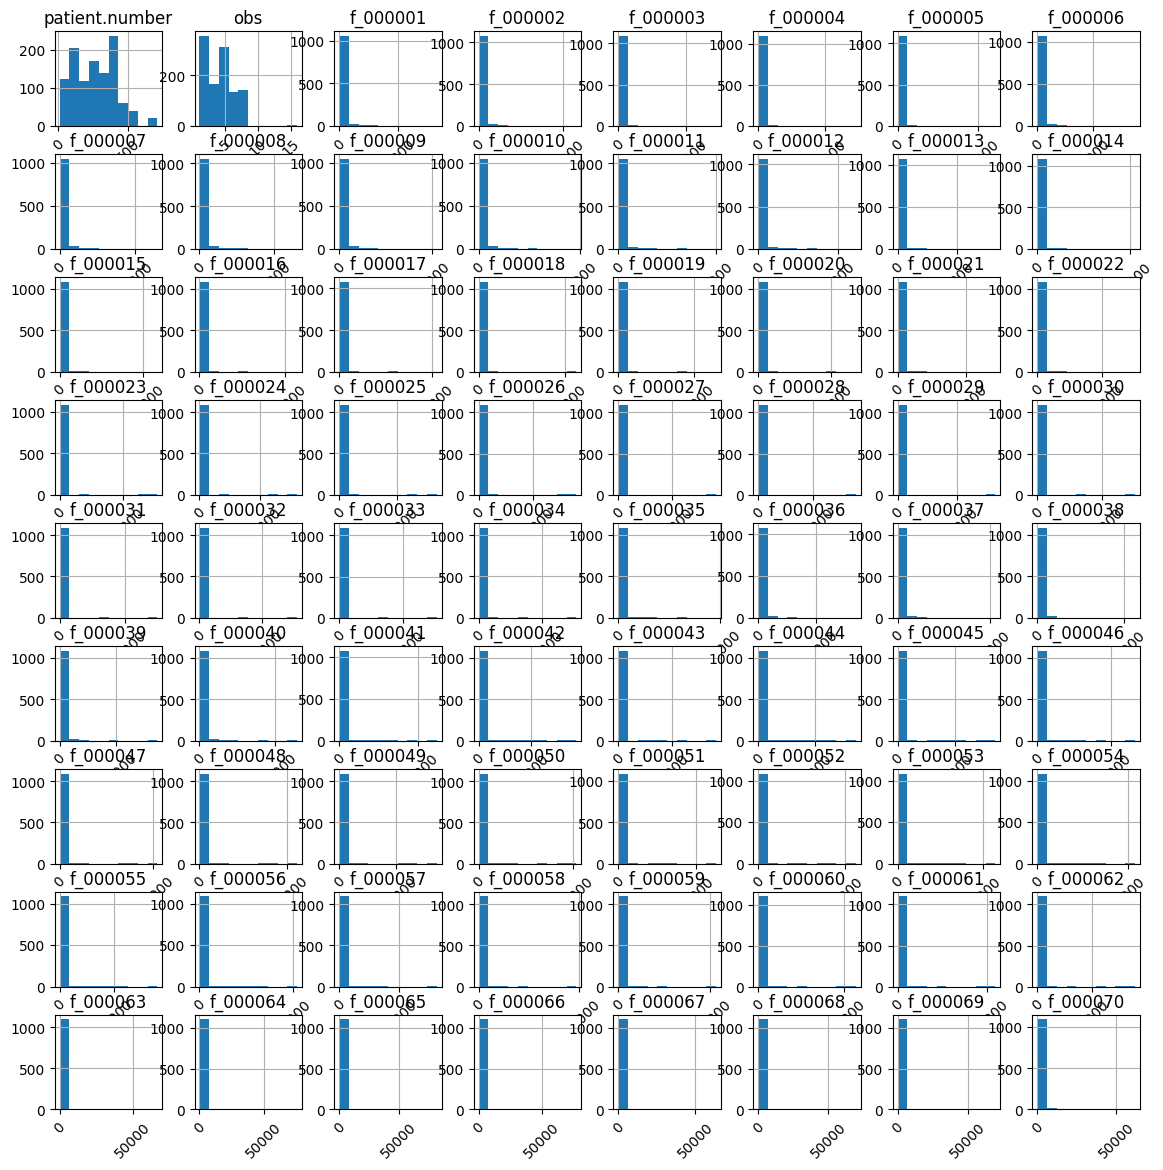

In [217]:
Retinopatia.hist(figsize = (14,14), xrot = 45)
plt.show()

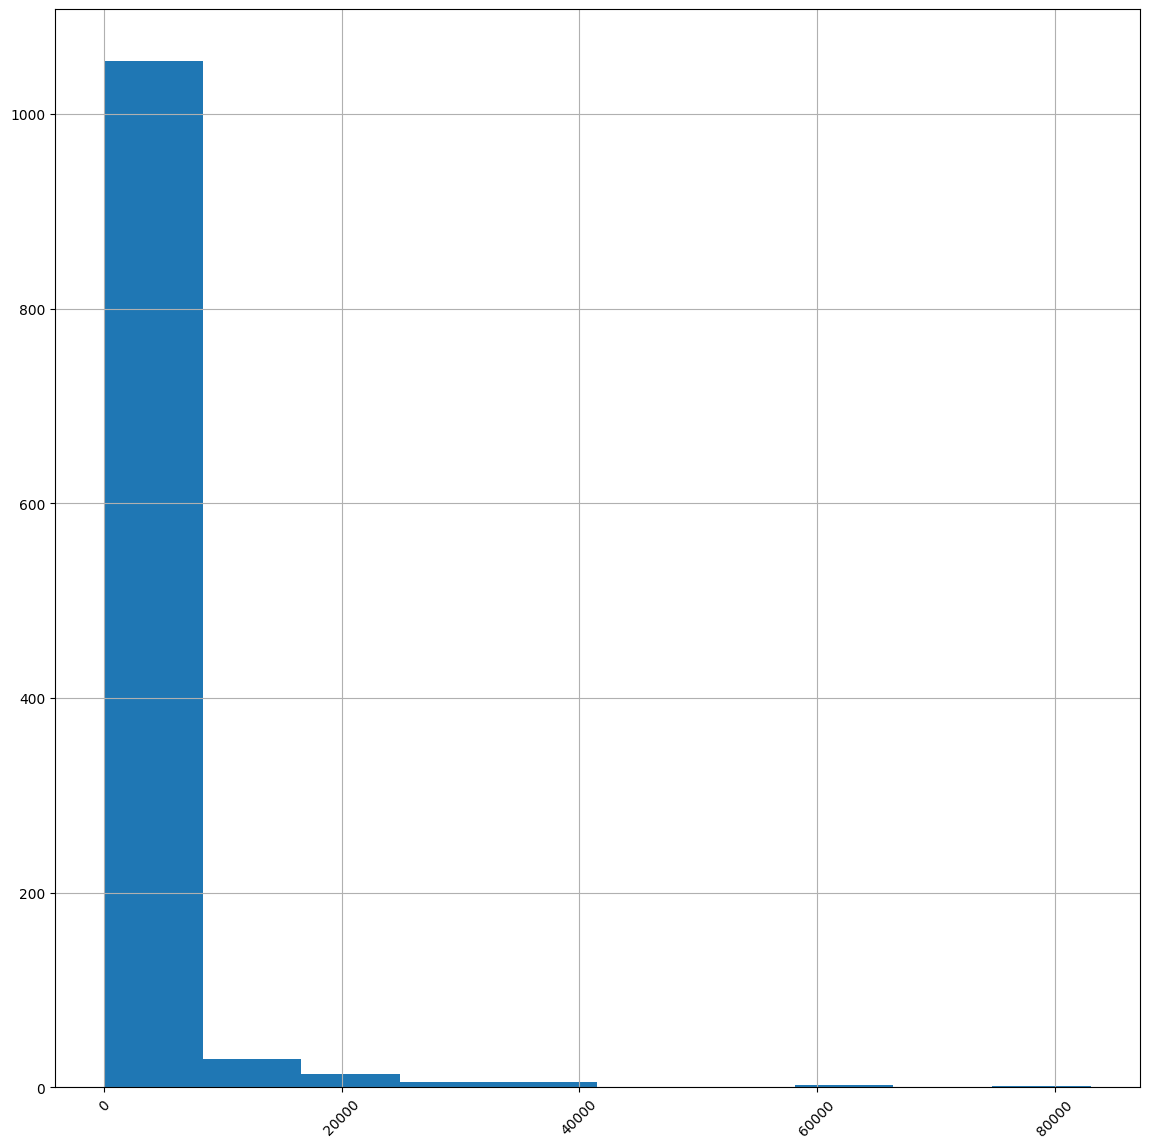

In [218]:
Retinopatia['f_000001'].hist(figsize = (14,14), xrot = 45)
plt.show()

Lo que se debe buscar en las gráficas son valores atípicos, que pueden ser errores de medición o límites sin sentido.

Al ser tantas variables, es muy difícil detectar valores atípicos en las gráficas, sin embargo, al analizar cada una por separado se llegó a la conclusión de que tienen valores sesgados a la derecha.

Hay dos formas de manejar los valores atípicos:
- Eliminarlos, si los valores resultan ser errores de medición o no son muy importantes según el objetivo del modelo, eliminarlos es una buena opción.
- Mantenerlos, es posible que los valores atípicos sean importantes para el modelo, por lo que el considerarlos evitaría sesgos en los resultados.

2. Resumen estadístico

Se usa **describe()** para obtener un recuento de la media, desviación estándar, mínimo, máximo, percentiles, etc. del conjunto de datos.

In [219]:
Retinopatia.describe()

,patient.number,obs,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,...,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03,1.112000e+03
mean,270.146583,3.856115,2016.799777,1903.097887,1802.860053,1720.894230,1663.336937,1627.622311,1597.457359,1561.603520,...,5.620728e+02,5.268927e+02,4.856362e+02,4.562636e+02,4.434820e+02,4.398660e+02,4.334379e+02,4.166063e+02,3.911023e+02,3.650029e+02
std,149.109867,2.121210,5623.463873,5942.420044,6392.486618,6290.537508,5645.872733,5062.374533,4858.983308,4805.405693,...,5.225834e+03,4.709330e+03,4.229311e+03,4.073566e+03,4.076967e+03,3.946923e+03,3.688649e+03,3.410182e+03,3.063764e+03,2.656352e+03
min,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.020000e-60,5.780000e-60,7.230000e-60,7.630000e-60,6.080000e-60,3.750000e-60,1.870000e-60,7.870000e-61,2.910000e-61,9.780000e-62
25%,143.000000,2.000000,94.595032,95.339032,93.371658,88.078723,83.469282,79.522746,75.171477,71.717748,...,2.859505e+00,2.983129e+00,3.322606e+00,3.891821e+00,4.564573e+00,5.046256e+00,5.446277e+00,5.763030e+00,5.765531e+00,5.768648e+00
50%,261.500000,4.000000,328.782783,310.667368,292.058260,275.527480,271.010004,267.470694,260.898003,255.150837,...,8.423920e+00,8.977666e+00,9.741452e+00,1.117428e+01,1.340485e+01,1.534127e+01,1.641342e+01,1.728839e+01,1.747099e+01,1.660368e+01
75%,390.250000,6.000000,1332.124207,1250.079057,1168.506726,1113.418396,1045.604225,1007.341541,985.209478,945.582122,...,2.857576e+01,2.869736e+01,3.104263e+01,3.524946e+01,3.987672e+01,4.766970e+01,5.485603e+01,5.769738e+01,5.646472e+01,5.252793e+01
max,709.000000,16.000000,83032.903920,115217.305100,143934.423200,146001.297100,121126.243000,87568.449470,64605.600060,65526.717950,...,1.091849e+05,9.006676e+04,6.660087e+04,7.586677e+04,8.139030e+04,7.718928e+04,6.352670e+04,6.939803e+04,6.937636e+04,6.170293e+04


3. Diagramas de caja

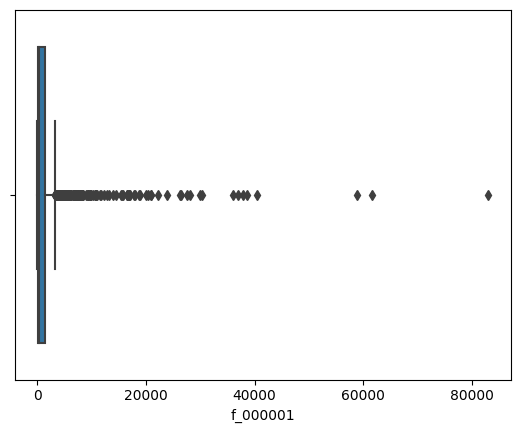

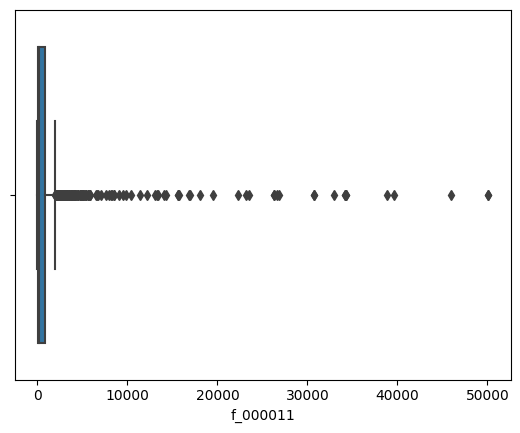

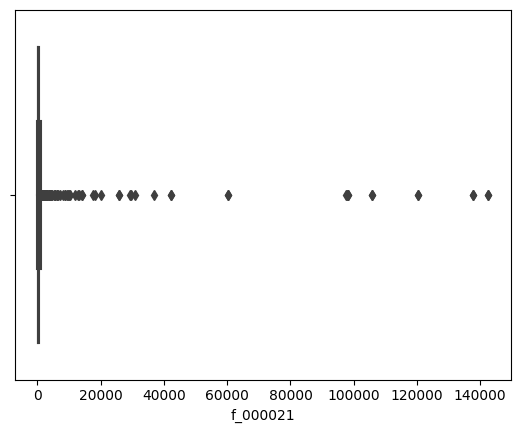

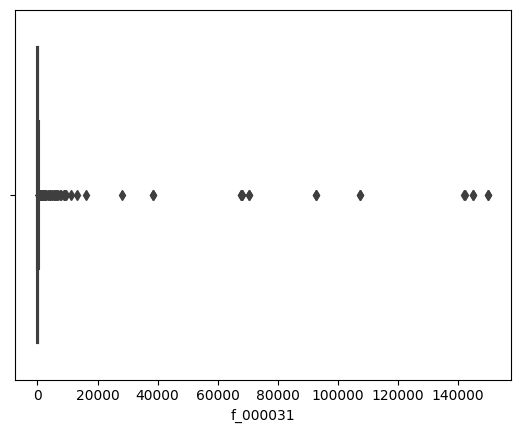

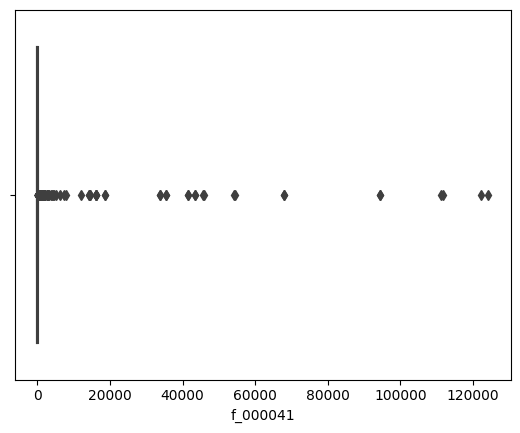

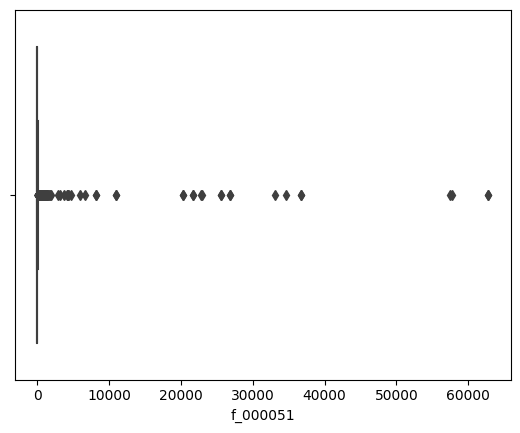

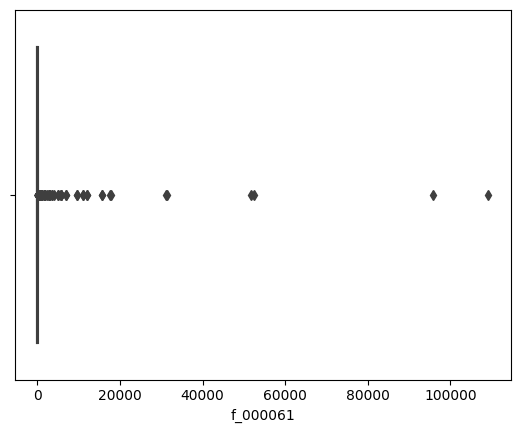

In [220]:
VariablesValoresAtipicos = ['f_000001', 'f_000011', 'f_000021', 'f_000031', 'f_000041','f_000051','f_000061']
for col in VariablesValoresAtipicos:
  sns.boxplot(x = Retinopatia[col])
  plt.show()

Se puede notar a simple vista que todos los sensores tienen valores atípicos que no pueden ser descartados fácilmente por su propia naturaleza, es decir, que vienen de sensores.

En estos casos es mejor hacer una fusión de datos, para que así se puedan obtener valores representativos para un conjunto de sensores, de esta forma cada valor influirá de la misma forma en la fusión.

### Distribución de variables categóricas

1. Resumen estadísticos

In [221]:
Retinopatia.describe(include = 'object')

,patient,health.status,group
count,1112,1112,1112
unique,1112,2,1
top,paciente151_1,health,none
freq,1,556,1112


Acá se puede observar que hay 1112 pacientes, cada uno con identificador único. En health.status al parecer hay dos opciones: health y disorder, para las cuales health es la que tiene mayor fecuencia. Finalmente, en group el único valor que existe es none y obviamente es el que tiene mayor frecuencia.

## *Paso 4 - Identificación de relaciones entre pares de variables*

El objetivo principal de detectar relaciones entre pares de variables durante el proceso de EDA es obtener evidencia que permita realizar un análisis de componentes principales con el fin de reducir la dimensionalidad del conjunto de datos.

Aunque reducir la dimensionalidad es uno de los objetivos importantes en este ejercicio, es importante tener en cuenta que las variables presentadas aquí corresponden a la misma medición tomada por varios sensores, por lo que es de esperar que presenten una fuerte correlación entre sí. Por esta razón, realizar un heatmap para identificar las relaciones puede no ser necesario y se podría saltar este paso.

Adicionalmente, debido a la naturaleza de los datos, una estrategia más adecuada para reducir la dimensionalidad podría ser la fusión de datos en lugar de un análisis de componentes principales. A continuación, se presenta el procedimiento para llevar a cabo la fusión de datos.

# **II. Fusión de datos**

## *Gráfica de los valores a fusionar*

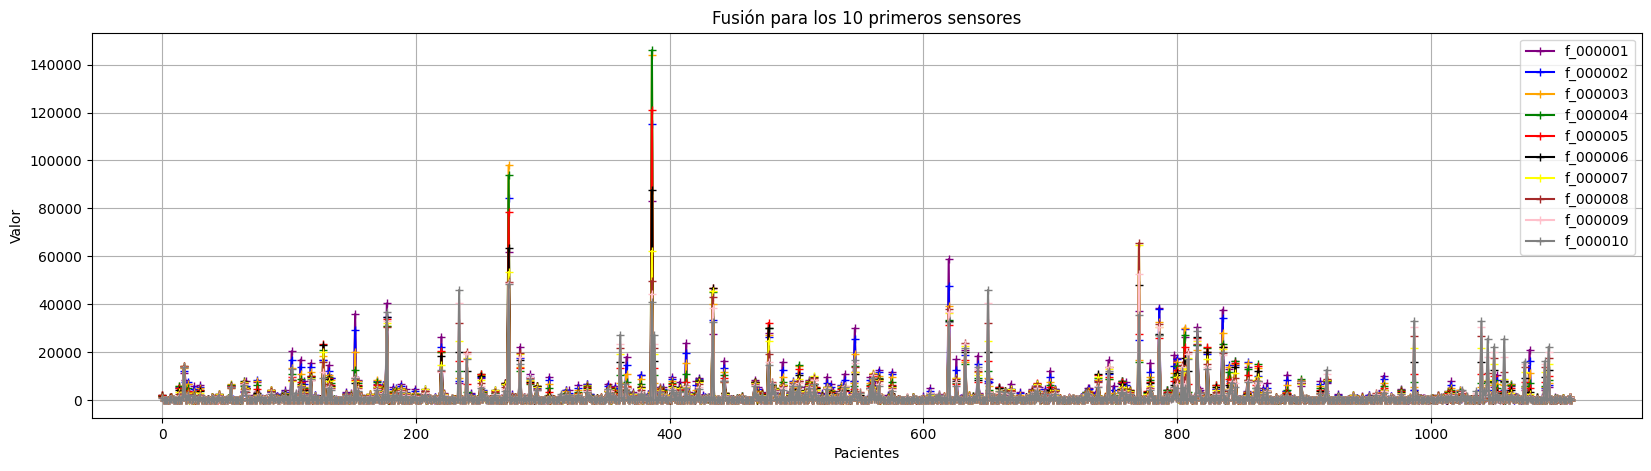

In [222]:
plt.figure(figsize=(20, 5))
plt.plot(Retinopatia['f_000001'], color='purple', marker='+', label='f_000001')
plt.plot(Retinopatia['f_000002'], color='blue', marker='+', label='f_000002')
plt.plot(Retinopatia['f_000003'], color='orange', marker='+', label='f_000003')
plt.plot(Retinopatia['f_000004'], color='green', marker='+', label='f_000004')
plt.plot(Retinopatia['f_000005'], color='red', marker='+', label='f_000005')
plt.plot(Retinopatia['f_000006'], color='black', marker='+', label='f_000006')
plt.plot(Retinopatia['f_000007'], color='yellow', marker='+', label='f_000007')
plt.plot(Retinopatia['f_000008'], color='brown', marker='+', label='f_000008')
plt.plot(Retinopatia['f_000009'], color='pink', marker='+', label='f_000009')
plt.plot(Retinopatia['f_000010'], color='gray', marker='+', label='f_000010')
plt.xlabel('Pacientes')
plt.ylabel('Valor')
plt.title('Fusión para los 10 primeros sensores')
plt.grid(True)
plt.legend()
plt.show()

## *Fusión de datos tradicional*

1. Eliminación de columnas que no interesan para la fusión de datos. Es importante también eliminar las variables categóricas

In [230]:
Fusion = Retinopatia.drop(columns = ['patient', 'patient.number', 'obs', 'group'])
Fusion

,health.status,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,health,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,health,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,disorder,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,health,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,health,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,health,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,health,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,health,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,health,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


2. Eliminación de valores nulos.

El EDA ya confirmó que el Data Frame no tiene valores nulos, pero aún así es buena práctica hacer un **dropna()**

In [232]:
Fusion = Fusion.dropna()
Fusion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   health.status  1112 non-null   object 
 1   f_000001       1112 non-null   float64
 2   f_000002       1112 non-null   float64
 3   f_000003       1112 non-null   float64
 4   f_000004       1112 non-null   float64
 5   f_000005       1112 non-null   float64
 6   f_000006       1112 non-null   float64
 7   f_000007       1112 non-null   float64
 8   f_000008       1112 non-null   float64
 9   f_000009       1112 non-null   float64
 10  f_000010       1112 non-null   float64
 11  f_000011       1112 non-null   float64
 12  f_000012       1112 non-null   float64
 13  f_000013       1112 non-null   float64
 14  f_000014       1112 non-null   float64
 15  f_000015       1112 non-null   float64
 16  f_000016       1112 non-null   float64
 17  f_000017       1112 non-null   float64
 18  f_000018

,health.status,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,health,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,health,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,disorder,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,health,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,health,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,health,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,health,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,health,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,health,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


3. Cálculo del Promedio

In [225]:
# Se Seleccionan todas las columnas numéricas
#num_cols = Fusion.select_dtypes(include=[np.number]).columns
#num_cols

In [226]:
# Se dividen en grupos de 5
#col_groups = [num_cols[i:i+5] for i in range(0, len(num_cols), 5)]
#col_groups

In [227]:
# Se Calcula el promedio para cada grupo de 5 columnas y se añade una columna para cada Promedio
#for group in col_groups:
#    Fusion[f'{group[0]}_to_{group[-1]}_mean'] = Fusion[group].mean(axis=1)

#Fusion


Se fusionarán de 5 en 5 bloques. 14 bloques, es decir matriz de 14 columnas al final. Al lado se pone la media, mediana... 1 es dependiente y 4 predictoras.

In [228]:
print(Retinopatia.groupby('health.status').size())

health.status
disorder    556
health      556
dtype: int64
